In [1]:
#pip install imblearn

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import metrics

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from numpy import argmax

# Data exploration

In [3]:
#We open the dataset and explore our data.
docum1 = pd.read_csv('Data.csv')
pd.set_option('display.max_columns', None , 'max_colwidth', None , 'display.expand_frame_repr', True)
print(docum1.info())
docum1.shape
docum1.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


We observe that there are no negative values.
We can decide that every float type is numeric attribute, while each bool, and object type is categoric.
In terms of integer type, we assume that the columns with no zero values are categoric whereas the other are numeric. Our output and our aim to predict is the last categorical column named "Revenue"


In [4]:
docum1.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
#We distinquish the columns in numerical and categorical features
# Numerics : Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated,
#ProductRelated_Duration, BounceRates, ExitRates, PageValues, SpecialDay
Numerical_feat = docum1.iloc[:,:-8]
 
# Categorics : Month, OperatingSystems, Browser, Region, TrafficType, VisitorType, Weekend
Categorical_feat = docum1.iloc[:,10:]

## Univariate Analysis
For Univariate Analysis we explore variable one by one, depending on whether a variable type is categorical or coninuous we perform different methods.

#### Continuous Variables:
For the continuous variables it is important to understand the central tendency and spread of variables, which are measured using various statistical visualization methods.

In [6]:
Numerical_feat.nunique(axis=0)

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
dtype: int64

In [7]:
docum1.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


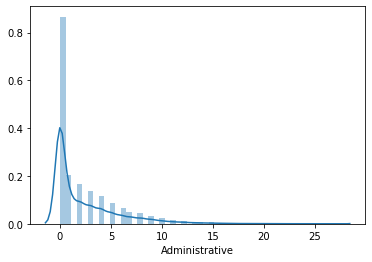

In [8]:
sns.distplot(docum1['Administrative'])

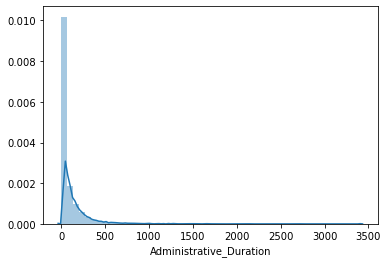

In [9]:
sns.distplot(docum1['Administrative_Duration'])

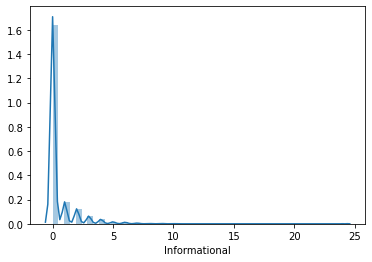

In [10]:
sns.distplot(docum1['Informational'],kde_kws = {'bw' : 0.2})

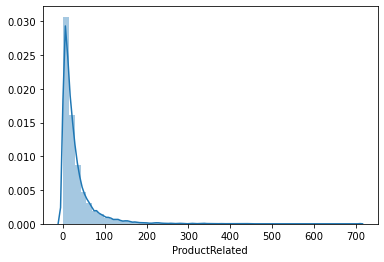

In [11]:
sns.distplot(docum1['ProductRelated'])

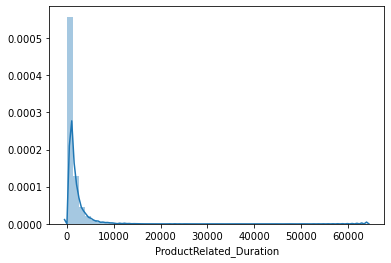

In [12]:
sns.distplot(docum1['ProductRelated_Duration'])

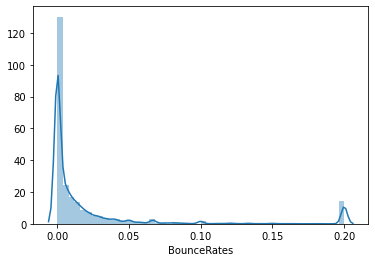

In [13]:
sns.distplot(docum1['BounceRates'])

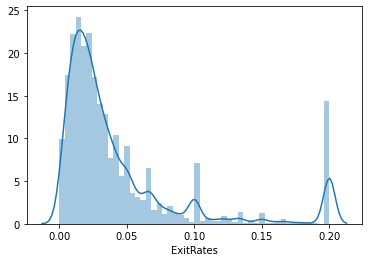

In [14]:
sns.distplot(docum1['ExitRates'])

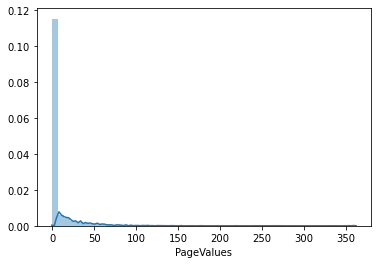

In [15]:
sns.distplot(docum1['PageValues'],kde_kws = {'bw' : 0.2})

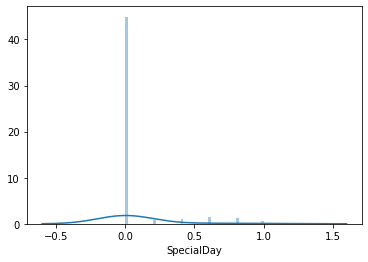

In [16]:
sns.distplot(docum1['SpecialDay'],kde_kws = {'bw' : 0.2})

### Categorical Variables 
In order to understand distribution of each category we will use bar charts as visualization.

In [17]:
for feature in Categorical_feat:
    print(docum1[feature].value_counts())

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64
2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64
False    9462
True     2868
Name: Weekend, dtype: int64
False    10422
Tru

We observed that our output "Revenue" has False values 10422 while True values are only 1908.  We have a ratio approximately of 5:1 which indicates imbalanced data.

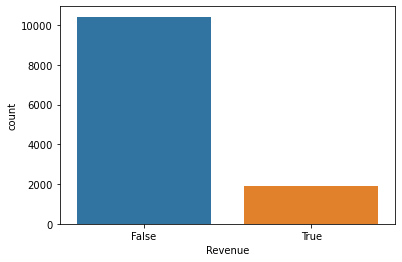

In [18]:
pl = sns.countplot(x="Revenue", data=docum1 )

## Bivariate Analysis
In this stage we want to find out relationships between variables. We are looking for association between them and we implement bivariate analysis for any combination of categorical and continuous attributes.

#### Continuous - Continuous
We created some scatter plots for the continous variables in order to find out their relationship, which can be linear,  non-linear or zero.

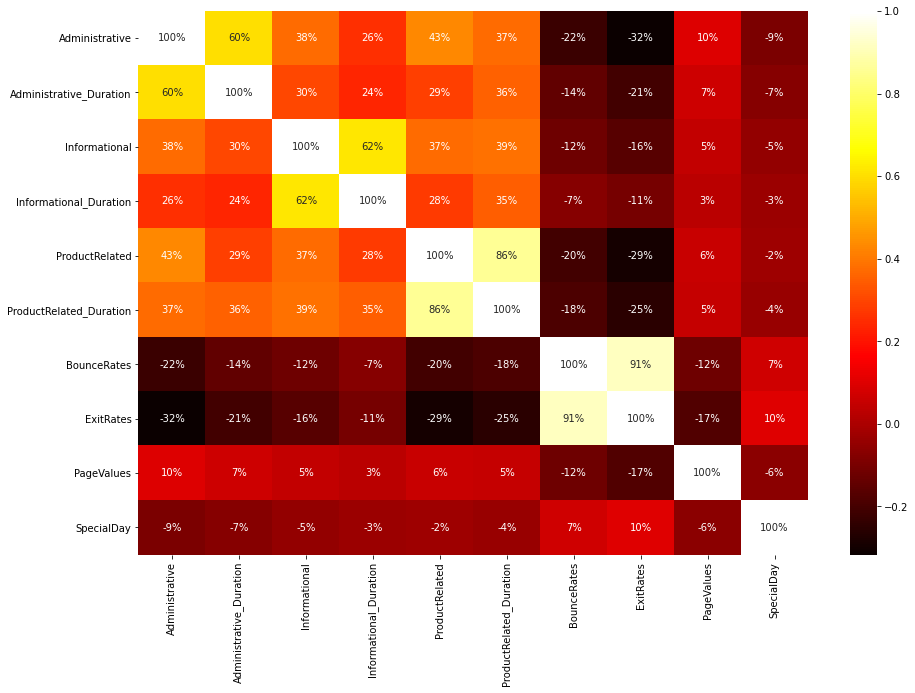

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(Numerical_feat.corr(), annot=True, fmt='.0%', cmap='hot')

#### Categorical - Continuous

C:\Users\c2027059\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\c2027059\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\c2027059\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


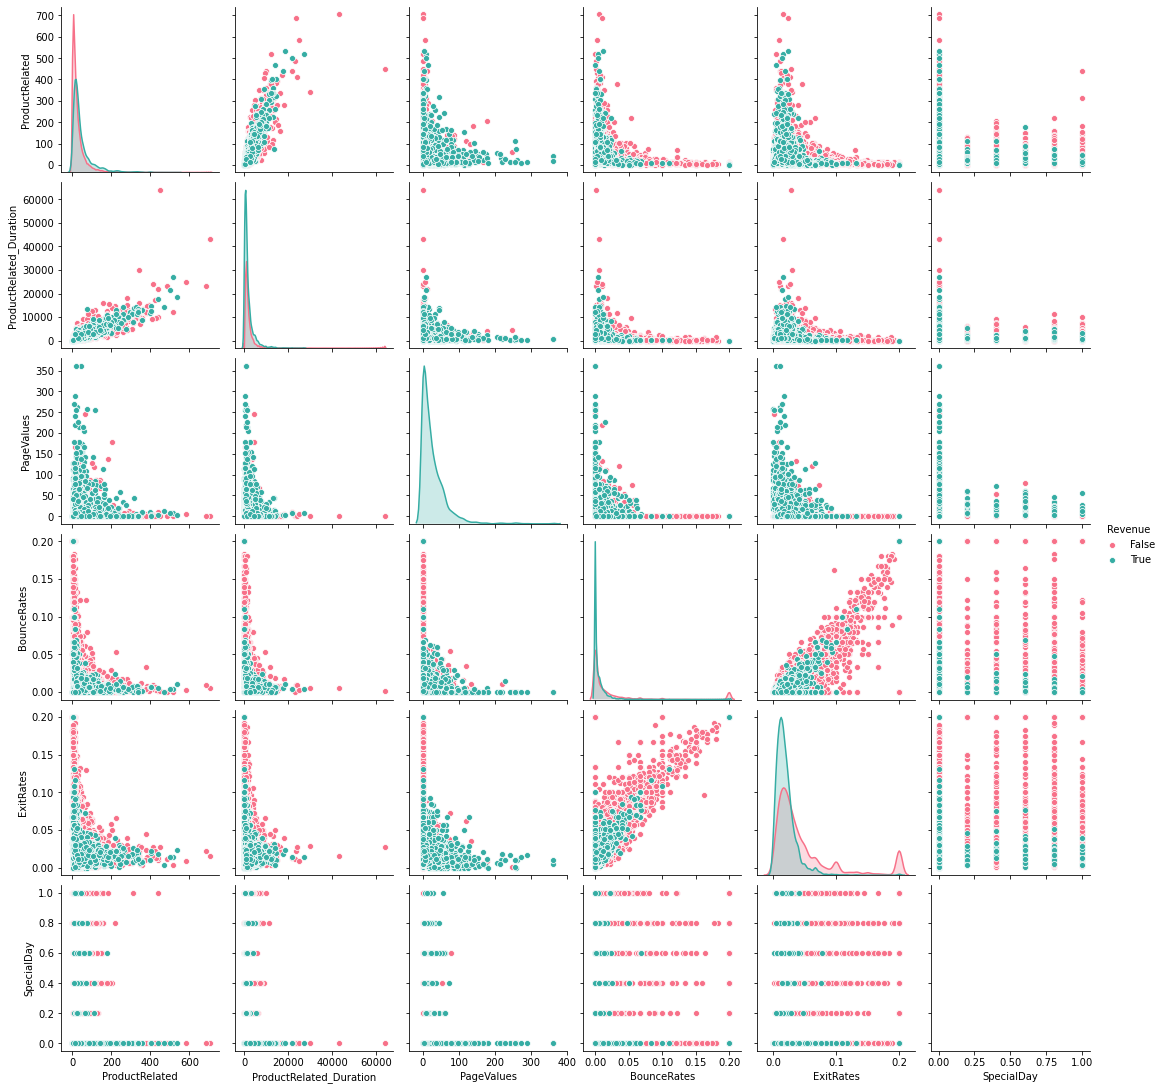

In [20]:
sns.pairplot(docum1[['ProductRelated','ProductRelated_Duration','PageValues','BounceRates','ExitRates','Revenue','SpecialDay']], hue= 'Revenue', palette="husl")

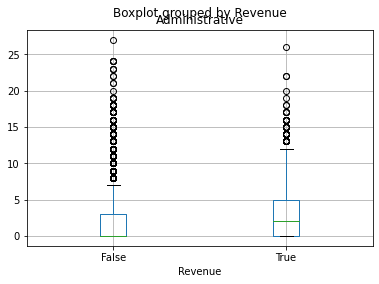

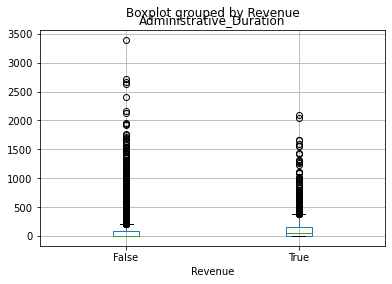

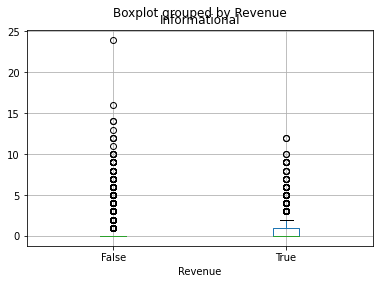

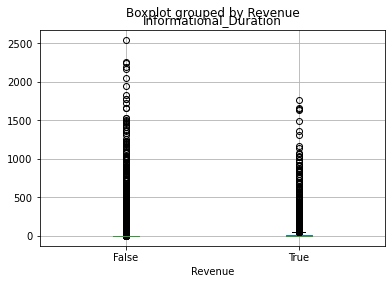

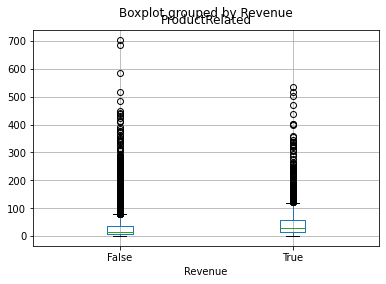

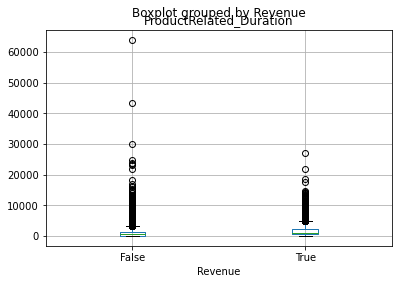

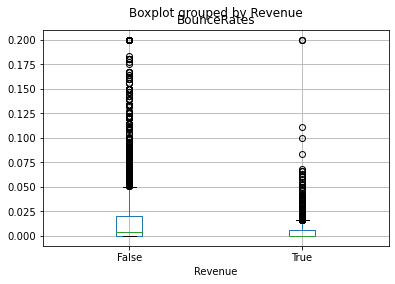

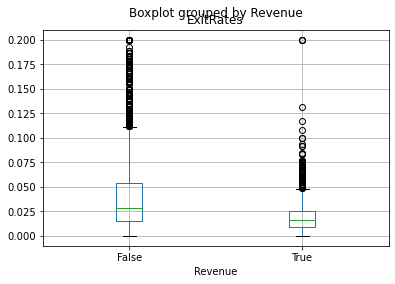

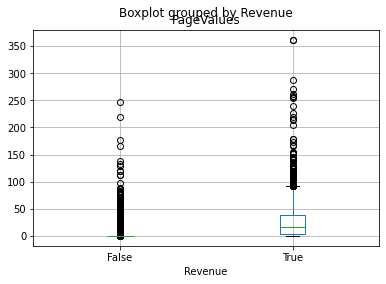

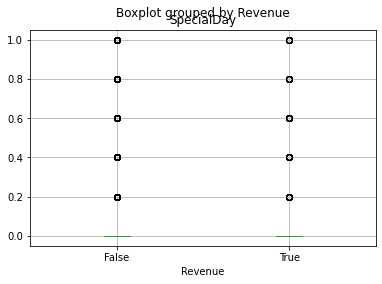

In [21]:
# Box plots below depicts that in our data there are lot of outliers.However we do not remove or transform them
#into speciffic values, as we consider them crucial information for our dataset. 
for i in Numerical_feat:
    docum1.boxplot(column = i,by='Revenue')

In [22]:
#Again skewness shows existance of outliers.
print(Numerical_feat.skew())

Administrative             1.960357
Administrative_Duration    5.615719
Informational              4.036464
Informational_Duration     7.579185
ProductRelated             4.341516
ProductRelated_Duration    7.263228
BounceRates                2.947855
ExitRates                  2.148789
PageValues                 6.382964
SpecialDay                 3.302667
dtype: float64


### Categorical - Categorical

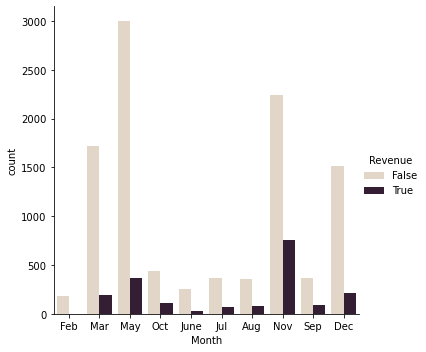

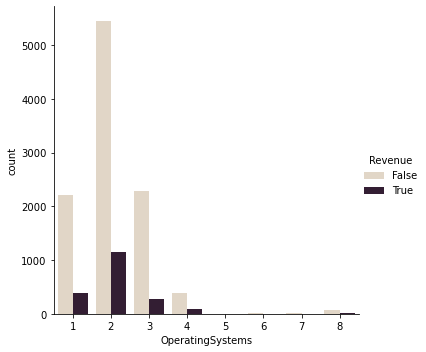

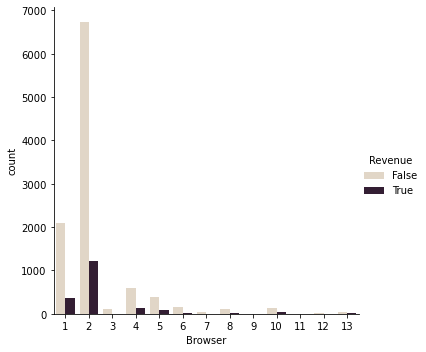

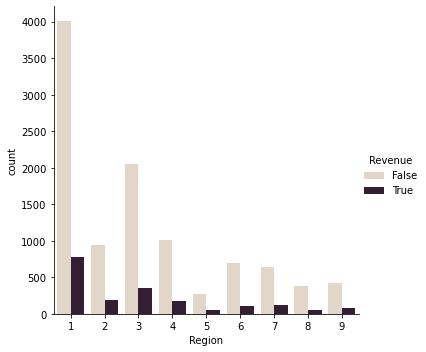

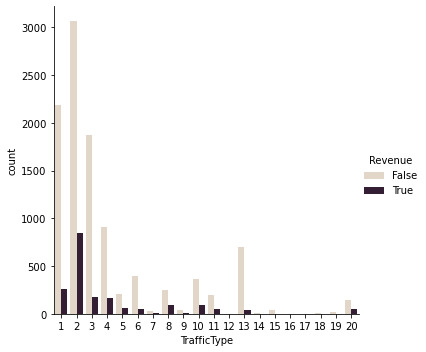

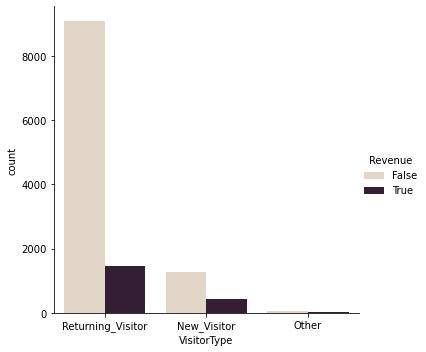

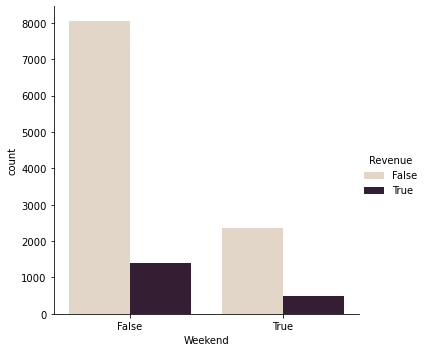

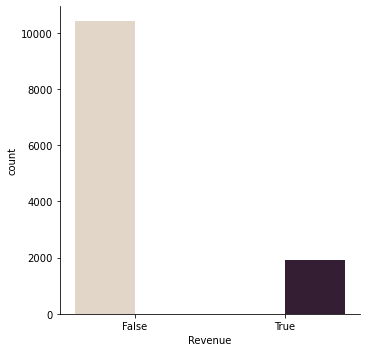

In [23]:
for i in Categorical_feat:
    sns.catplot(x=i,hue='Revenue', kind="count", palette="ch:.25", data=docum1)

# Cleaning the data.
### Searching for missing values

In [24]:
docum1.isna().sum()
#No missing values were found.

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

# Data preprocessing

In [25]:
#Firstly we encode the categorical attribute Revenue.
enc= OneHotEncoder(drop='first',sparse= False)
enc.fit(docum1[['Revenue']])
docum_c = pd.DataFrame(enc.transform(docum1[['Revenue']]))

docum1= pd.concat([docum1.iloc[:,:-1],docum_c],axis=1)
docum1.rename(columns={0:'Revenue'},inplace=True)
docum1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,0.0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,0.0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,0.0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,0.0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,0.0


Split the dataset into independent (X) and dependent (Y) datasets.        
Split the data, into 75% training dataset and 25% testing dataset.

In [27]:
X_= docum1.drop('Revenue',axis=1)
Y_= docum1[['Revenue']]
X_train_ , X_test_, Y_train_, Y_test_ = train_test_split( X_, Y_, test_size=0.25, random_state=42)

# 1)Basic model & finding the best scaler

In the basic model we only transformed the categorical data with OneHotEncoding and in the next step we use 4 basic Scalers for the numerical attributes to see which one can deal better with the outliers in our data in specific classifiers.

In [28]:
Categorical_feat = ['Month','VisitorType','Weekend','OperatingSystems','Browser','Region','TrafficType']
Numerical_feat = ['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','ExitRates','BounceRates','PageValues','SpecialDay']

In [30]:
scalers = [RobustScaler(), StandardScaler(), MinMaxScaler(), PowerTransformer()]

for scaler in range(4):
    preprocessor_basic = ColumnTransformer([('categoricals', OneHotEncoder(handle_unknown='ignore'), Categorical_feat),
                                      ('numericals_scaler', scalers[scaler], Numerical_feat)])

    Classifiers= [LogisticRegression( random_state=42),SVC( random_state=42),
                 XGBClassifier( random_state=42)]

    for i in range(3):
        pipe = Pipeline(steps=[('preprocessor',preprocessor_basic),('Classifier',Classifiers[i])])
        pipe.fit(X_train_,Y_train_)
        print(scalers[scaler])
        print(Classifiers[i])
        y_pred_ = np.around(pipe.predict(X_test_))
        print('Metrics:')
        print(metrics.classification_report(Y_test_, y_pred_))
        
        accuracy = accuracy_score(Y_test_,y_pred_) 
        print('Accuracy: %f' % accuracy)
        print('---------------------------')

C:\Users\c2027059\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\c2027059\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\c2027059\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rav

RobustScaler()
LogisticRegression(random_state=42)
Metrics:
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93      2594
         1.0       0.75      0.36      0.48       489

    accuracy                           0.88      3083
   macro avg       0.82      0.67      0.71      3083
weighted avg       0.87      0.88      0.86      3083

Accuracy: 0.879338
---------------------------
RobustScaler()
SVC(random_state=42)
Metrics:
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      2594
         1.0       0.71      0.45      0.55       489

    accuracy                           0.88      3083
   macro avg       0.81      0.71      0.74      3083
weighted avg       0.87      0.88      0.87      3083

Accuracy: 0.883555
---------------------------
[04:17:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evalua

C:\Users\c2027059\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\c2027059\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


RobustScaler()
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Metrics:
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94      2594
         1.0       0.68      0.57      0.62       489

    accuracy                           0.89      3083
   macro avg       0.80      0.76      0.78      3083
weighted avg       0.88      0.89      0.89      3083

Accuracy: 0.889393
---------------------------
StandardScaler()
Lo

C:\Users\c2027059\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\c2027059\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\c2027059\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rav

Metrics:
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93      2594
         1.0       0.73      0.35      0.48       489

    accuracy                           0.88      3083
   macro avg       0.81      0.66      0.70      3083
weighted avg       0.86      0.88      0.86      3083

Accuracy: 0.876743
---------------------------
StandardScaler()
SVC(random_state=42)
Metrics:
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      2594
         1.0       0.73      0.48      0.58       489

    accuracy                           0.89      3083
   macro avg       0.82      0.72      0.76      3083
weighted avg       0.88      0.89      0.88      3083

Accuracy: 0.889718
---------------------------
[04:17:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logis

C:\Users\c2027059\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\c2027059\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


StandardScaler()
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Metrics:
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94      2594
         1.0       0.71      0.60      0.65       489

    accuracy                           0.90      3083
   macro avg       0.82      0.78      0.79      3083
weighted avg       0.89      0.90      0.89      3083

Accuracy: 0.896854
---------------------------


C:\Users\c2027059\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\c2027059\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\c2027059\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rav

MinMaxScaler()
LogisticRegression(random_state=42)
Metrics:
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93      2594
         1.0       0.78      0.26      0.39       489

    accuracy                           0.87      3083
   macro avg       0.83      0.62      0.66      3083
weighted avg       0.86      0.87      0.84      3083

Accuracy: 0.870905
---------------------------
MinMaxScaler()
SVC(random_state=42)
Metrics:
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92      2594
         1.0       0.90      0.09      0.16       489

    accuracy                           0.85      3083
   macro avg       0.87      0.54      0.54      3083
weighted avg       0.86      0.85      0.80      3083

Accuracy: 0.853714
---------------------------
[04:17:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evalua

C:\Users\c2027059\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\c2027059\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MinMaxScaler()
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Metrics:
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94      2594
         1.0       0.72      0.60      0.65       489

    accuracy                           0.90      3083
   macro avg       0.83      0.78      0.80      3083
weighted avg       0.89      0.90      0.90      3083

Accuracy: 0.900097
---------------------------


C:\Users\c2027059\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\c2027059\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


PowerTransformer()
LogisticRegression(random_state=42)
Metrics:
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94      2594
         1.0       0.70      0.58      0.63       489

    accuracy                           0.89      3083
   macro avg       0.81      0.77      0.79      3083
weighted avg       0.89      0.89      0.89      3083

Accuracy: 0.893934
---------------------------


C:\Users\c2027059\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


PowerTransformer()
SVC(random_state=42)
Metrics:
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94      2594
         1.0       0.71      0.59      0.64       489

    accuracy                           0.90      3083
   macro avg       0.81      0.77      0.79      3083
weighted avg       0.89      0.90      0.89      3083

Accuracy: 0.895556
---------------------------
[04:17:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\c2027059\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\c2027059\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



PowerTransformer()
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Metrics:
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94      2594
         1.0       0.71      0.60      0.65       489

    accuracy                           0.90      3083
   macro avg       0.82      0.78      0.79      3083
weighted avg       0.89      0.90      0.89      3083

Accuracy: 0.896854
---------------------------


We consider the metrics showed it the matrix in order to compare performances. To be more specific, precision, recall and f1 score are our main metrics. Because we have imbalanced data the accuracy that we calculated seems to be misleading.

It seems that RobustScaler, MinMaxScaler and StandardScaler do not handle well outliers and as a result, some classifiers such as Logistic Regression and Support Vector Machine can not work appropriately. Thus, we take the PowerTransformer for scaling numerical features.

# 2)Second model with extra pre-proccessing.

## Data Transformation
We have indentified in some categorical features too many values with very low number of observations which might cause overfitting. These features are "Browser", "Traffic Type" and "Operating Systems". Binning technique has been used to smooth the data. Firstly we have divided observations in "False" and "True" Revenue. We calculated the False/True percentages and based on these numbers we repositioned the observations in new fewer bins.

In [2]:
#We open again the dataset
docum = pd.read_csv('Data.csv')

#We encode the categorical attribute Revenue.
enc= OneHotEncoder(drop='first',sparse= False)
enc.fit(docum[['Revenue']])
docum_c = pd.DataFrame(enc.transform(docum[['Revenue']]))

docum= pd.concat([docum.iloc[:,:-1],docum_c],axis=1)
docum.rename(columns={0:'Revenue'},inplace=True)
docum.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,0.0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,0.0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,0.0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,0.0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,0.0


### Binning.

In [3]:
print(docum['Browser'].value_counts())

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64


In [4]:
#Binning the Browser column.
for number1 in range(1,14):
    Browser_True = docum.loc[(docum['Browser'] == number1) & (docum['Revenue'] == True)].Browser.sum()
    Browser_False =docum.loc[(docum['Browser'] == number1) & (docum['Revenue'] == False)].Browser.sum()   
    P1 = Browser_False/Browser_True
    print(number1, ':' ,P1)

1 : 5.745205479452054
2 : 5.509403107113655
3 : 20.0
4 : 4.661538461538462
5 : 4.430232558139535
6 : 7.7
7 : 7.166666666666667
8 : 5.428571428571429
9 : inf
10 : 4.09375
11 : 5.0
12 : 2.3333333333333335
13 : 2.8125


<ipython-input-4-1ed9a3f562f4>:5: RuntimeWarning: divide by zero encountered in longlong_scalars
  P1 = Browser_False/Browser_True


In [5]:
#We combined them into bins, based on the above rates.
#In that way we keep the rates Browser_False/Browser_True unchanged in the new bins
conditions1 = [docum['Browser'] == 1, docum['Browser'] == 2,docum['Browser'] == 3,docum['Browser'] == 4,
              docum['Browser'] == 5, docum['Browser'] == 6,docum['Browser'] == 7,docum['Browser'] == 8,
              docum['Browser'] == 9,docum['Browser'] == 10,docum['Browser'] == 11,docum['Browser'] == 12,
              docum['Browser'] == 13]

choices1 = ['1','1','3','2','2','4','4','1','3','2','1','5','5']

docum['New_Browser'] = np.select(conditions1, choices1, default='Other')
docum.drop(['Browser'], axis=1, inplace = True)

In [6]:
#we continue alike with Traffic Type column .

for number2 in range(1,21):
    TrafficType_True =docum.loc[(docum['TrafficType'] == number2) & (docum['Revenue'] == True)].TrafficType.sum()
    TrafficType_False =docum.loc[(docum['TrafficType'] == number2) & (docum['Revenue'] == False)].TrafficType.sum()   
    P2 = TrafficType_False/TrafficType_True
    print(number2,':',P2)
    
conditions2 = [docum['TrafficType'] == 1,docum['TrafficType'] == 2,docum['TrafficType'] == 3,docum['TrafficType'] == 4,
        docum['TrafficType'] == 5,docum['TrafficType'] == 6,docum['TrafficType'] == 7,docum['TrafficType'] == 8,
        docum['TrafficType'] == 9,docum['TrafficType'] == 10,docum['TrafficType'] == 11,docum['TrafficType'] == 12,
        docum['TrafficType'] == 13,docum['TrafficType'] == 14,docum['TrafficType'] == 15,docum['TrafficType'] == 16,
        docum['TrafficType'] == 17,docum['TrafficType'] == 18,docum['TrafficType'] == 19,docum['TrafficType'] == 20]
choices2 = ['1','2','1','3','2','1','4','5','1','2','2','6','7','3','6','4','6','6','7','5']

docum['New_TrafficType'] = np.select(conditions2, choices2, default='Other')
docum.drop(['TrafficType'], axis=1, inplace = True)

1 : 8.354961832061068
2 : 3.6198347107438016
3 : 10.4
4 : 5.4787878787878785
5 : 3.642857142857143
6 : 7.377358490566038
7 : 2.3333333333333335
8 : 2.610526315789474
9 : 9.5
10 : 4.0
11 : 4.25531914893617
12 : inf
13 : 16.162790697674417
14 : 5.5
15 : inf
16 : 2.0
17 : inf
18 : inf
19 : 16.0
20 : 2.96


<ipython-input-6-59efcf0103d8>:6: RuntimeWarning: divide by zero encountered in longlong_scalars
  P2 = TrafficType_False/TrafficType_True


In [7]:
#Lastly we use binning method for Operating Systems.
for number3 in range(1,9):
    OperatingSystems_True = docum.loc[(docum['OperatingSystems'] == number3) & (docum['Revenue'] == True)].OperatingSystems.sum()
    OperatingSystems_False = docum.loc[(docum['OperatingSystems'] == number3) & (docum['Revenue'] == False)].OperatingSystems.sum()
    P3 = OperatingSystems_False/OperatingSystems_True
    print(number3,':',P3)

conditions3 = [docum['OperatingSystems'] == 1,docum['OperatingSystems'] == 2,
            docum['OperatingSystems'] == 3,docum['OperatingSystems'] == 4,
            docum['OperatingSystems'] == 5,docum['OperatingSystems'] == 6,
            docum['OperatingSystems'] == 7,docum['OperatingSystems'] == 8]

choices3 = ['1','2','3','2','2','3','1','4']

docum['New_OperatingSystems'] = np.select(conditions3, choices3, default='Other')
docum.drop(['OperatingSystems'], axis=1, inplace = True)

1 : 5.820580474934037
2 : 4.715151515151515
3 : 8.533582089552239
4 : 4.623529411764705
5 : 5.0
6 : 8.5
7 : 6.0
8 : 3.6470588235294117


In [8]:
docum.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,Region,VisitorType,Weekend,Revenue,New_Browser,New_TrafficType,New_OperatingSystems
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,Returning_Visitor,False,0.0,1,1,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,1,Returning_Visitor,False,0.0,1,2,2
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,9,Returning_Visitor,False,0.0,1,1,2
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,2,Returning_Visitor,False,0.0,1,3,3
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,1,Returning_Visitor,True,0.0,3,3,3


### Multicollinearity
As the scatter plots firstly had depicted, and then the high correlation percentages in heatmap, we might have the multicollinearity phonomenon in our dataset. For that reason,we have calculated the Variance Infation Factor (VIF) for the independent variables.

In [9]:
# We used https://etav.github.io/python/vif_factor_python.html for implementing well the code above.

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

independent_columns = docum[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']]
print(type(independent_columns))

calc_vif(independent_columns)

<class 'pandas.core.frame.DataFrame'>


,variables,VIF
0,Administrative,2.651491
1,Administrative_Duration,2.041915
2,Informational,2.113723
3,Informational_Duration,1.777154
4,ProductRelated,6.339345
5,ProductRelated_Duration,6.012012
6,BounceRates,5.557495
7,ExitRates,5.978858
8,PageValues,1.077806
9,SpecialDay,1.105706


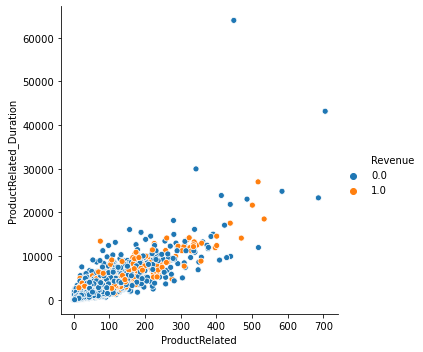

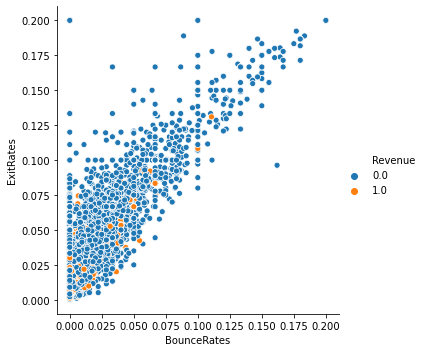

In [10]:
sns.relplot(data=docum, x="ProductRelated", y="ProductRelated_Duration", hue="Revenue",kind="scatter")
sns.relplot(data=docum, x="BounceRates", y="ExitRates", hue="Revenue",kind="scatter")

The VIF results shows us that the columns ProductRelated with ProductRelated_Duration and BounceRates with ExiRates inputs are highly influence each other. That means variables are not actually independent. In order to avoid causing problems in certain algorithms, We decided to drop the column ProductRelated and Exit rates.

In [11]:
#We tried every combination of dropping every column. We kept the combination wich gave us the best results.
try:
    docum.drop(['ExitRates'], axis=1, inplace = True)
    docum.drop(['ProductRelated'], axis=1, inplace = True)
except KeyError:
    print('Attributes already removed')

In [12]:
docum.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,Month,Region,VisitorType,Weekend,Revenue,New_Browser,New_TrafficType,New_OperatingSystems
0,0,0.0,0,0.0,0.000000,0.20,0.0,0.0,Feb,1,Returning_Visitor,False,0.0,1,1,1
1,0,0.0,0,0.0,64.000000,0.00,0.0,0.0,Feb,1,Returning_Visitor,False,0.0,1,2,2
2,0,0.0,0,0.0,0.000000,0.20,0.0,0.0,Feb,9,Returning_Visitor,False,0.0,1,1,2
3,0,0.0,0,0.0,2.666667,0.05,0.0,0.0,Feb,2,Returning_Visitor,False,0.0,1,3,3
4,0,0.0,0,0.0,627.500000,0.02,0.0,0.0,Feb,1,Returning_Visitor,True,0.0,3,3,3


In [13]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

independent_columns = docum[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated_Duration','BounceRates','PageValues','SpecialDay']]
calc_vif(independent_columns)

,variables,VIF
0,Administrative,2.325482
1,Administrative_Duration,1.965009
2,Informational,2.094024
3,Informational_Duration,1.755086
4,ProductRelated_Duration,1.707504
5,BounceRates,1.040089
6,PageValues,1.073658
7,SpecialDay,1.050994


There are no high values after dropping ProductRelated and ExitRates which had more than 5.

In [14]:
#Split dataset into train and test sets.
X= docum.drop('Revenue',axis=1)
Y= docum[['Revenue']]
X_train , X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.25, random_state=42)

In [44]:
Categorical_feat2 = ['Month','VisitorType','Weekend','New_OperatingSystems','New_Browser','Region','New_TrafficType']
Numerical_feat2 = ['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated_Duration','BounceRates','PageValues','SpecialDay']

preprocessor2 = ColumnTransformer([('categoricals', OneHotEncoder(handle_unknown='ignore'), Categorical_feat2),
                                  ('numericals_scaler', PowerTransformer(), Numerical_feat2)])

Classifiers2= [LogisticRegression(random_state=42),SVC(random_state=42),
               XGBClassifier(random_state=42)]

for i in range(3):
    pipe2 = Pipeline(steps=[('preprocessor',preprocessor2),('Classifier',Classifiers2[i])])
    pipe2.fit(X_train,Y_train)
    print(Classifiers2[i])
    y_pred2 = (pipe2.predict(X_test))
    print('Metrics:')
    print(metrics.classification_report(Y_test, y_pred2))

    accuracy2 = accuracy_score(Y_test,y_pred2) 
    print('Accuracy: %f' % accuracy2)
    print('---------------------------')

C:\Users\c2027059\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\c2027059\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)
Metrics:
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94      2594
         1.0       0.69      0.58      0.63       489

    accuracy                           0.89      3083
   macro avg       0.80      0.76      0.78      3083
weighted avg       0.89      0.89      0.89      3083

Accuracy: 0.891340
---------------------------


C:\Users\c2027059\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(random_state=42)
Metrics:
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94      2594
         1.0       0.70      0.60      0.65       489

    accuracy                           0.90      3083
   macro avg       0.81      0.78      0.79      3083
weighted avg       0.89      0.90      0.89      3083

Accuracy: 0.896205
---------------------------
[04:18:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c2027059\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\c2027059\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Metrics:
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94      2594
         1.0       0.70      0.61      0.65       489

    accuracy                           0.90      3083
   macro avg       0.81      0.78      0.79      3083
weighted avg       0.89      0.90      0.89      3083

Accuracy: 0.896205
---------------------------


It seems that our extra pre-proccessing improves our results negligible. As a result we continue to handle the imbalances in both models to see if they will be improved.

# 3)Balancing both models to see how balancing contributes to performances.  
Next, we balanced the data(not perfectly) to see if balancing influence positively to our models since we observed imbalance data.
We used appropriate parameters for each of our classifiers seperatly. For LogisticRegression and for Support Vector Machine are the class_weight = {0:0.3,1:0.7} and for the XGBClassifier we used the scale_pos_weight=5.

In [43]:
#Balancing the Second model. (This is the model with the extra pre-processing)

Categorical_feat3 = ['Month','VisitorType','Weekend','New_OperatingSystems','New_Browser','Region','New_TrafficType']
Numerical_feat3 = ['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated_Duration','BounceRates','PageValues','SpecialDay']

preprocessor3 = ColumnTransformer([('categoricals', OneHotEncoder(handle_unknown='ignore'), Categorical_feat3),
                                  ('numericals_scaler', PowerTransformer(), Numerical_feat3)])

Classifiers3= [LogisticRegression(class_weight = {0:0.3,1:0.7},random_state=42),SVC(class_weight = {0:0.3,1:0.7},random_state=42),
               XGBClassifier(scale_pos_weight=5,random_state=42)]

for i in range(3):
    pipe3 = Pipeline(steps=[('preprocessor',preprocessor3),('Classifier',Classifiers3[i])])
    pipe3.fit(X_train,Y_train)
    print(Classifiers3[i])
    y_pred3 = (pipe3.predict(X_test))
    print('Metrics:')
    print(metrics.classification_report(Y_test, y_pred3))

    accuracy3 = accuracy_score(Y_test,y_pred3) 
    print('Accuracy: %f' % accuracy3)
    print('---------------------------')

C:\Users\c2027059\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\c2027059\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 0.3, 1: 0.7}, random_state=42)
Metrics:
              precision    recall  f1-score   support

         0.0       0.95      0.90      0.93      2594
         1.0       0.59      0.75      0.66       489

    accuracy                           0.88      3083
   macro avg       0.77      0.83      0.79      3083
weighted avg       0.89      0.88      0.88      3083

Accuracy: 0.878365
---------------------------


C:\Users\c2027059\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(class_weight={0: 0.3, 1: 0.7}, random_state=42)
Metrics:
              precision    recall  f1-score   support

         0.0       0.96      0.89      0.92      2594
         1.0       0.58      0.80      0.68       489

    accuracy                           0.88      3083
   macro avg       0.77      0.85      0.80      3083
weighted avg       0.90      0.88      0.89      3083

Accuracy: 0.878041
---------------------------


C:\Users\c2027059\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\c2027059\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[17:51:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Metrics:
              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93

### Next we open again the dataset to balancing the first model which columns are unchanged.

In [45]:
#We open again the dataset
docum1 = pd.read_csv('Data.csv')

#We encode the categorical attribute Revenue.
enc= OneHotEncoder(drop='first',sparse= False)
enc.fit(docum1[['Revenue']])
docum_c = pd.DataFrame(enc.transform(docum1[['Revenue']]))

docum1= pd.concat([docum1.iloc[:,:-1],docum_c],axis=1)
docum1.rename(columns={0:'Revenue'},inplace=True)
docum1.head()

#Split dataset into train and test sets.
X1= docum1.drop('Revenue',axis=1)
Y1= docum1[['Revenue']]
X1_train , X1_test, Y1_train, Y1_test = train_test_split( X1, Y1, test_size=0.25, random_state=42)

In [46]:
Categorical_feat_ = ['Month','VisitorType','Weekend','OperatingSystems','Browser','Region','TrafficType']
Numerical_feat_ = ['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']

preprocessor_ = ColumnTransformer([('Categorical_feat_', OneHotEncoder(handle_unknown='ignore'), Categorical_feat_),
                                  ('Numerical_feat_', PowerTransformer(), Numerical_feat_)])

Classifiers_= [LogisticRegression(class_weight = {0:0.3,1:0.7},random_state=42),SVC(class_weight = {0:0.3,1:0.7},random_state=42),
               XGBClassifier(scale_pos_weight=5,random_state=42)]

for i in range(3):
    pipe_ = Pipeline(steps=[('preprocessor_',preprocessor_),('Classifier_',Classifiers_[i])])
    pipe_.fit(X1_train,Y1_train)
    print(Classifiers_[i])
    y_pred1 = (pipe_.predict(X1_test))
    print('Metrics:')
    print(metrics.classification_report(Y1_test, y_pred1))

    accuracy_ = accuracy_score(Y1_test,y_pred1) 
    print('Accuracy: %f' % accuracy_)
    print('---------------------------')

C:\Users\c2027059\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\c2027059\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 0.3, 1: 0.7}, random_state=42)
Metrics:
              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93      2594
         1.0       0.60      0.74      0.66       489

    accuracy                           0.88      3083
   macro avg       0.77      0.82      0.79      3083
weighted avg       0.89      0.88      0.89      3083

Accuracy: 0.880311
---------------------------


C:\Users\c2027059\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(class_weight={0: 0.3, 1: 0.7}, random_state=42)
Metrics:
              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93      2594
         1.0       0.59      0.80      0.68       489

    accuracy                           0.88      3083
   macro avg       0.78      0.85      0.80      3083
weighted avg       0.90      0.88      0.89      3083

Accuracy: 0.880636
---------------------------
[04:20:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\c2027059\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\c2027059\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Metrics:
              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93      2594
         1.0       0.61      0.69      0.64       489

    accuracy                           0.88      3083
   macro avg       0.77      0.80      0.79      3083
weighted avg       0.89      0.88      0.88      3083

Accuracy: 0.879338
---------------------------


#### The model with extra pre-processing, seems that can be improved more that the 1st model when balancing the data.
#### This is why we chose the model with the extra pre-processing to optimize it.
#### In general, in terms of performance, the results indicate a slight increase when we adjust the imbalanced data.
#### Next, we will keep the parameter class_weight and we are about to optimize each classifier seperately

We define our classifiers and optimize them seperatly. 

# Logistic Regression Fit and Tuning.


In [15]:
Categorical_feat3 = ['Month','VisitorType','Weekend','New_OperatingSystems','New_Browser','Region','New_TrafficType']
Numerical_feat3 = ['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated_Duration','BounceRates','PageValues','SpecialDay']

preprocessor3 = ColumnTransformer([('categoricals', OneHotEncoder(handle_unknown='ignore'), Categorical_feat3),
                                  ('numericals_scaler', PowerTransformer(), Numerical_feat3)])

In [51]:
#define pipeline
model_LR = LogisticRegression(random_state=42,class_weight = {0:0.3,1:0.7})
steps_LR = [('preprocessing', preprocessor3),('model_LR', model_LR)]
pipeline_LR = Pipeline(steps=steps_LR)

#fit pipeline in test set
pipe_LR = pipeline_LR.fit(X_train,Y_train)
print(model_LR)

#results
y_pred_LR = (pipe_LR.predict(X_test))
print('Metrics:')
print(metrics.classification_report(Y_test, y_pred_LR))

accuracy_LR = accuracy_score(Y_test,y_pred_LR) 
print('Accuracy: %f' % accuracy_LR)
print('---------------------------')


#Tunning
#Deffine the hyperparameters.
C = np.logspace(-1, 4, 10)
penalty = ['l1', 'l2','elasticnet']

class_weight=[{0:x, 1:1.0-x} for x in np.linspace(0,0.99)]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

space_LR = {'model_LR__C' : C ,'model_LR__penalty': penalty, 'model_LR__class_weight' : class_weight,
          'model_LR__solver' : solver}

# define search
cv_LR = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

# Random Search 
Random_search = RandomizedSearchCV(pipe_LR, space_LR, scoring='f1', n_jobs=-1, cv=cv_LR) 

# execute search
result_LR = Random_search.fit(X_train, Y_train)

# summarize result
print('Best Score: %s' % result_LR.best_score_)
print('Best Hyperparameters: %s' % result_LR.best_params_)


C:\Users\c2027059\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\c2027059\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 0.3, 1: 0.7}, random_state=42)
Metrics:
              precision    recall  f1-score   support

         0.0       0.95      0.90      0.93      2594
         1.0       0.59      0.75      0.66       489

    accuracy                           0.88      3083
   macro avg       0.77      0.83      0.79      3083
weighted avg       0.89      0.88      0.88      3083

Accuracy: 0.878365
---------------------------


C:\Users\c2027059\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Best Score: 0.6672140100867795
Best Hyperparameters: {'model_LR__solver': 'newton-cg', 'model_LR__penalty': 'l2', 'model_LR__class_weight': {0: 0.28285714285714286, 1: 0.7171428571428571}, 'model_LR__C': 1.291549665014884}


AUC score = 0.662
Best Threshold=0.417845, F-Score=0.670


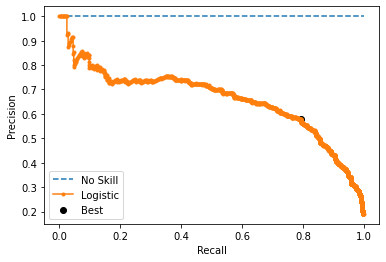

In [36]:
#The code was taken from: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
#Finds the best threshold to achive the best F1-measure

# predict probabilities
yhat_LR = pipe_LR.predict_proba(X_test)

# keep probabilities for the positive outcome only
yhat_LR = yhat_LR[:, 1]

# calculate roc curves
precision_LR, recall_LR, thresholds_LR = precision_recall_curve(Y_test, yhat_LR)

auc_prc_LR = auc(recall_LR, precision_LR) 
print('AUC score = %.3f' %auc_prc_LR)

# convert to f score
fscore_LR = (2 * precision_LR * recall_LR) / (precision_LR + recall_LR)

# locate the index of the largest f score
ix_LR = argmax(fscore_LR)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds_LR[ix_LR], fscore_LR[ix_LR]))

# plot the roc curve for the model_LR
no_skill_LR = len(Y_test[Y_test==1]) / len(Y_test)
pyplot.plot([0,1], [no_skill_LR,no_skill_LR], linestyle='--', label='No Skill')
pyplot.plot(recall_LR, precision_LR, marker='.', label='Logistic')

pyplot.scatter(recall_LR[ix_LR], precision_LR[ix_LR], marker='o', color='black', label='Best')

# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()

# show the plot
pyplot.show()

Testing the suggested parameters from the RandomSearh results.

In [52]:
#define pipeline
model_LR1 = LogisticRegression(random_state=42,class_weight = {0:0.28285714285714286,1:0.7171428571428571},solver= 'newton-cg',
                               penalty='l2', C= 1.291549665014884 )
steps_LR1 = [('preprocessing', preprocessor3),('model_LR', model_LR1)]
pipeline_LR1 = Pipeline(steps=steps_LR1)

#fit pipeline in test set
pipe_LR1 = pipeline_LR1.fit(X_train,Y_train)
print(model_LR1)

#results
y_pred_LR1 = (pipe_LR1.predict(X_test))
print('Metrics:')
print(metrics.classification_report(Y_test, y_pred_LR1))

accuracy_LR1 = accuracy_score(Y_test,y_pred_LR1) 
print('Accuracy: %f' % accuracy_LR1)
print('---------------------------')


LogisticRegression(C=1.291549665014884,
                   class_weight={0: 0.28285714285714286, 1: 0.7171428571428571},
                   random_state=42, solver='newton-cg')
Metrics:
              precision    recall  f1-score   support

         0.0       0.95      0.90      0.93      2594
         1.0       0.59      0.76      0.66       489

    accuracy                           0.88      3083
   macro avg       0.77      0.83      0.79      3083
weighted avg       0.89      0.88      0.88      3083

Accuracy: 0.877717
---------------------------


C:\Users\c2027059\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# Support Vector Machine (SVM) Fit and Tuning.

In [18]:
#define pipeline
model_SVC = SVC(random_state=42,class_weight = {0:0.3,1:0.7}, probability = True)
steps_SVC = [('preprocessing', preprocessor3),('model_SVC', model_SVC)]
pipeline_SVC = Pipeline(steps=steps_SVC)

#fit pipeline in test set
pipe_SVC = pipeline_SVC.fit(X_train,Y_train)
print(model_SVC)

#results
y_pred_SVC = (pipe_SVC.predict(X_test))
print('Metrics:')
print(metrics.classification_report(Y_test, y_pred_SVC))

accuracy_SVC = accuracy_score(Y_test,y_pred_SVC) 
print('Accuracy: %f' % accuracy_SVC)
print('---------------------------')


#Tunning
#Deffine the hyperparameters.
C = np.logspace(1, 4, 20)

class_weight=[{0:x, 1:1-x} for x in np.linspace(0,0.99,200)]
kernels = ('linear', 'rbf','sigmoid','recomputed','poly')

space_SVC = {'model_SVC__C' : C ,'model_SVC__kernel': kernels, 'model_SVC__class_weight' : class_weight}

# define search
cv_SVC = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
Random_search = RandomizedSearchCV(pipe_SVC, space_SVC, scoring='f1', n_jobs=-1, cv=cv_SVC) 
# execute search
result_SVC = Random_search.fit(X_train, Y_train)

# summarize result
print('Best Score: %s' % result_SVC.best_score_)
print('Best Hyperparameters: %s' % result_SVC.best_params_)

C:\Users\c2027059\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(class_weight={0: 0.3, 1: 0.7}, probability=True, random_state=42)
Metrics:
              precision    recall  f1-score   support

         0.0       0.96      0.89      0.92      2594
         1.0       0.58      0.80      0.68       489

    accuracy                           0.88      3083
   macro avg       0.77      0.85      0.80      3083
weighted avg       0.90      0.88      0.89      3083

Accuracy: 0.878041
---------------------------


C:\Users\c2027059\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Best Score: 0.6680532920503249
Best Hyperparameters: {'model_SVC__kernel': 'poly', 'model_SVC__class_weight': {0: 0.2736180904522613, 1: 0.7263819095477386}, 'model_SVC__C': 0.08858667904100823}


** The Best Score after the optimization is smaller since the results cames from the cross-validation. It takes the average from the k-folds

AUC score = 0.665
Best Threshold=0.316778, F-Score=0.680


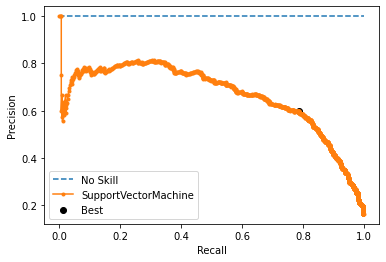

In [21]:
# predict probabilities
yhat_SVC = pipe_SVC.predict_proba(X_test)

# keep probabilities for the positive outcome only
yhat_SVC = yhat_SVC[:, 1]

# calculate roc curves
precision_SVC, recall_SVC, thresholds_SVC = precision_recall_curve(Y_test, yhat_SVC)

auc_prc_SVC = auc(recall_SVC, precision_SVC) 
print('AUC score = %.3f' %auc_prc_SVC)

# convert to f score
fscore_SVC = (2 * precision_SVC * recall_SVC) / (precision_SVC + recall_SVC)

# locate the index of the largest f score
ix_SVC = argmax(fscore_SVC)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds_SVC[ix_SVC], fscore_SVC[ix_SVC]))

# plot the roc curve for the model_SVC
no_skill_SVC = len(Y_test[Y_test==1]) / len(Y_test)
pyplot.plot([0,1], [no_skill_SVC,no_skill_SVC], linestyle='--', label='No Skill')
pyplot.plot(recall_SVC, precision_SVC, marker='.', label='SupportVectorMachine')

pyplot.scatter(recall_SVC[ix_SVC], precision_SVC[ix_SVC], marker='o', color='black', label='Best')

# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()

# show the plot
pyplot.show()

Testing the suggested parameters from the RandomSearh results. For achieving the best combination from RandomSearch we should implement more parameters and run it more time, this is why when we tested the parameters did not optimize the model as in before optimizing we had F1_measure= 0.68

In [18]:
#define pipeline
model_SVC1 = SVC(random_state=42,class_weight = {0:0.2736180904522613,1:0.7263819095477386}, probability = True,
                 kernel= 'poly',C= 0.08858667904100823)
steps_SVC1 = [('preprocessing', preprocessor3),('model_SVC', model_SVC1)]
pipeline_SVC1 = Pipeline(steps=steps_SVC1)

#fit pipeline in test set
pipe_SVC1 = pipeline_SVC1.fit(X_train,Y_train)
print(model_SVC1)

#results
y_pred_SVC1 = (pipe_SVC1.predict(X_test))
print('Metrics:')
print(metrics.classification_report(Y_test, y_pred_SVC1))

accuracy_SVC1 = accuracy_score(Y_test,y_pred_SVC1) 
print('Accuracy: %f' % accuracy_SVC1)
print('---------------------------')

C:\Users\c2027059\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=0.08858667904100823,
    class_weight={0: 0.2736180904522613, 1: 0.7263819095477386}, kernel='poly',
    probability=True, random_state=42)
Metrics:
              precision    recall  f1-score   support

         0.0       0.96      0.89      0.92      2594
         1.0       0.58      0.80      0.67       489

    accuracy                           0.88      3083
   macro avg       0.77      0.85      0.80      3083
weighted avg       0.90      0.88      0.88      3083

Accuracy: 0.876743
---------------------------


# XGBoost Fit and Tuning. 

In [33]:
#define pipeline
model_XGB = XGBClassifier(random_state=42,scale_pos_weight = 5)
steps_XGB = [('preprocessing', preprocessor3),('model_XGB', model_XGB)]
pipeline_XGB = Pipeline(steps=steps_XGB)

#fit pipeline in test set
pipe_XGB = pipeline_XGB.fit(X_train,Y_train)
print(model_XGB)


#results
y_pred_XGB = pipe_XGB.predict(X_test)
print('Metrics:')
print(metrics.classification_report(Y_test, y_pred_XGB))

accuracy_XGB = accuracy_score(Y_test,y_pred_XGB)
print('Accuracy: %f' % accuracy_XGB)

#Tunning
#Deffine the hyperparameters.
learning_rate = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.5 ,0.75]
scale_pos_weight=list(range(10))
n_estimators = range(50, 300, 50)
max_depth=range(1, 10, 1)
min_child_weight = range(2,10)
subsample = [i/10.0 for i in range(3)]
gamma=[i/10.0 for i in range(3)]


space_XGB = {'model_XGB__max_depth' : max_depth ,'model_XGB__learning_rate': learning_rate,
          'model_XGB__n_estimators': n_estimators, 'model_XGB__scale_pos_weight' : scale_pos_weight, 
          'model_XGB__min_child_weight' : min_child_weight, 'model_XGB__subsample': subsample,
         'model_XGB__gamma': gamma}

# define search
cv_XGB = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)


Random_search = RandomizedSearchCV(pipe_XGB, space_XGB, scoring='f1', n_jobs=-1, cv=cv_XGB ) 

# execute search
result_XGB = Random_search.fit(X_train, Y_train)

# summarize result
print('Best Score: %s' % result_XGB.best_score_)
print('Best Hyperparameters: %s' % result_XGB.best_params_)

C:\Users\c2027059\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\c2027059\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:42:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Metrics:
              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93

C:\Users\c2027059\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\c2027059\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:44:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Score: 0.672078626907695
Best Hyperparameters: {'model_XGB__subsample': 0.1, 'model_XGB__scale_pos_weight': 3, 'model_XGB__n_estimators': 250, 'model_XGB__min_child_weight': 2, 'model_XGB__max_depth': 2, 'model_XGB__learning_rate': 0.1, 'model_XGB__gamma': 0.0}


AUC score = 0.723
Best Threshold=0.522515, F-Score=0.672


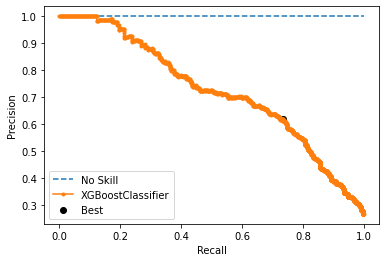

In [46]:
#The code was taken from: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
#Finds the best threshold to achive the best F1-measure

# predict probabilities
yhat_XGB = pipe_XGB.predict_proba(X_test)

# keep probabilities for the positive outcome only
yhat_XGB = yhat_XGB[:, 1]

# calculate roc curves
precision_XGB, recall_XGB, thresholds_XGB = precision_recall_curve(Y_test, yhat_XGB)

auc_prc_XGB = auc(recall_XGB, precision_XGB) 
print('AUC score = %.3f' %auc_prc_XGB)


# convert to f score
fscore_XGB = (2 * precision_XGB * recall_XGB) / (precision_XGB + recall_XGB)

# locate the index of the largest f score
ix_XGB = argmax(fscore_XGB)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds_XGB[ix_XGB], fscore_XGB[ix_XGB]))

# plot the roc curve for the model_XGB
no_skill_XGB = len(Y_test[Y_test==1]) / len(Y_test)
pyplot.plot([0,1], [no_skill_XGB,no_skill_XGB], linestyle='--', label='No Skill')
pyplot.plot(recall_XGB, precision_XGB, marker='.', label='XGBoostClassifier')

pyplot.scatter(recall_XGB[ix_XGB], precision_XGB[ix_XGB], marker='o', color='black', label='Best')

# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()

# show the plot
pyplot.show()

Testing the suggested parameters from the RandomSearh results.

In [45]:
#define pipeline
model_XGB1 = XGBClassifier(random_state=42,scale_pos_weight = 3,subsample= 0.1,n_estimators= 250,
                         min_child_weight= 2,max_depth= 2,learning_rate= 0.1,gamma= 0.0)
steps_XGB1 = [('preprocessing', preprocessor3),('model_XGB', model_XGB1)]
pipeline_XGB1 = Pipeline(steps=steps_XGB)

#fit pipeline in test set
pipe_XGB1 = pipeline_XGB1.fit(X_train,Y_train)
print(model_XGB1)

#results
y_pred_XGB1 = pipe_XGB1.predict(X_test)
print('Metrics:')
print(metrics.classification_report(Y_test, y_pred_XGB1))

accuracy_XGB1 = accuracy_score(Y_test,y_pred_XGB1)
print('Accuracy: %f' % accuracy_XGB1)

C:\Users\c2027059\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\c2027059\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:59:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=0.0,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=None, max_depth=2,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=None, num_parallel_tree=None,
              random_state=42, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=3, subsample=0.1, tree_method=None,
              validate_parameters=None, verbosity=None)
Metrics:
              precision    recall  f1-score   support

        